**first we all the Import necessary libraries**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Lets load the Datasets

In [2]:
links_df = pd.read_csv('/content/drive/MyDrive/Data_Science_assingment/links.csv')
movies_df = pd.read_csv('/content/drive/MyDrive/Data_Science_assingment/movies.csv')
ratings_df = pd.read_csv('/content/drive/MyDrive/Data_Science_assingment/ratings.csv')
tags_df = pd.read_csv('/content/drive/MyDrive/Data_Science_assingment/tags.csv')

Lets merge these DataFrames based on some common feature for combined Analysis

In [4]:
movies_links_df = pd.merge(movies_df, links_df, on='movieId', how='left')

In [5]:
movies_links_df.head()

,movieId,title,genres,imdbId,tmdbId
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,113497,8844.0
2,3,Grumpier Old Men (1995),Comedy|Romance,113228,15602.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,114885,31357.0
4,5,Father of the Bride Part II (1995),Comedy,113041,11862.0


In [6]:
movies_ratings_df = pd.merge(movies_links_df, ratings_df, on='movieId', how='left')

# Finally,we merge the result with tags on 'movieId' and 'userId'
full_data_df = pd.merge(movies_ratings_df, tags_df, on=['movieId', 'userId'], how='left')

In [7]:
movies_ratings_df.head()

,movieId,title,genres,imdbId,tmdbId,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,1.0,4.0,9.649827e+08
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,5.0,4.0,8.474350e+08
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,7.0,4.5,1.106636e+09
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,15.0,2.5,1.510578e+09
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,17.0,4.5,1.305696e+09


In [8]:
full_data_df.head()

,movieId,title,genres,imdbId,tmdbId,userId,rating,timestamp_x,tag,timestamp_y
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,1.0,4.0,9.649827e+08,NaN,NaN
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,5.0,4.0,8.474350e+08,NaN,NaN
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,7.0,4.5,1.106636e+09,NaN,NaN
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,15.0,2.5,1.510578e+09,NaN,NaN
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,17.0,4.5,1.305696e+09,NaN,NaN


# 1. Printing the shape of movies dataframe

In [9]:
movies_df.shape    #the output denotes there are 9742 rows and 3 columns(features)

(9742, 3)

# 2. The shape of Ratings Dataframe

In [10]:
ratings_df.shape   # So, ratings_df has 100,836 rows and 4 columns.

(100836, 4)

In [11]:
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


# 3.  unique "userId" available in "ratings.csv"

In [12]:
ratings_df['userId'].nunique()    # the userID column has 610 unique values

610

In [23]:
full_data_df.head()

,movieId,title,genres,imdbId,tmdbId,userId,rating,timestamp_x,tag,timestamp_y
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,1.0,4.0,9.649827e+08,NaN,NaN
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,5.0,4.0,8.474350e+08,NaN,NaN
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,7.0,4.5,1.106636e+09,NaN,NaN
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,15.0,2.5,1.510578e+09,NaN,NaN
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,17.0,4.5,1.305696e+09,NaN,NaN


# The movie with the maximum number of user ratings

In [27]:
most_rated_movie = full_data_df['title'].value_counts().idxmax()
print(f"The movie with the most ratings is: {most_rated_movie}")

The movie with the most ratings is: Pulp Fiction (1994)


In [26]:
top_movies = full_data_df.groupby('title')['rating'].count().nlargest(5)

# Print the top 5 movies with the highest number of ratings
print("Top 5 movies with the highest number of ratings:")
print(top_movies)

Top 5 movies with the highest number of ratings:
title
Pulp Fiction (1994)                 484
Forrest Gump (1994)                 335
Shawshank Redemption, The (1994)    319
Silence of the Lambs, The (1991)    283
Matrix, The (1999)                  280
Name: rating, dtype: int64


# Correct tags for "The Matrix (1999)"

In [30]:
matrix_tags = full_data_df[(full_data_df['title'] == 'Matrix, The (1999)') & full_data_df['tag'].notna()]

# Print unique tags for "The Matrix (1999)"
print("Unique tags for 'The Matrix (1999)':")
print(matrix_tags['tag'].unique())

Unique tags for 'The Matrix (1999)':
['martial arts' 'sci-fi' 'alternate universe' 'philosophy'
 'post apocalyptic']


#  Average user rating for "Terminator 2: Judgment Day (1991)"

In [21]:
average_rating_terminator = full_data_df[full_data_df['title'] == 'Terminator 2: Judgment Day (1991)']['rating'].mean()
print(f"Average user rating for 'Terminator 2: Judgment Day (1991)': {average_rating_terminator:.2f}")

Average user rating for 'Terminator 2: Judgment Day (1991)': 3.93


## Data distribution of user ratings for "Fight Club (1999)"

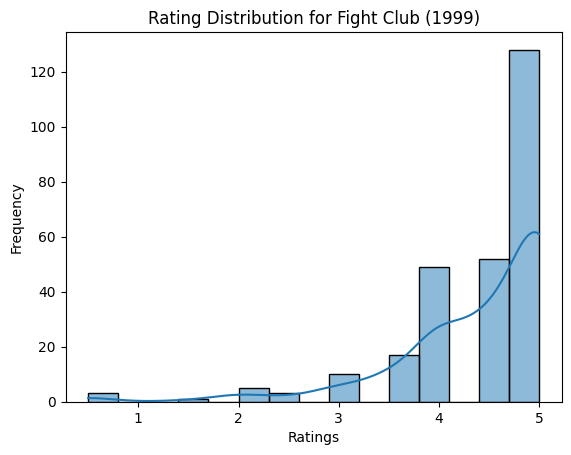

In [28]:
fight_club_ratings = full_data_df[full_data_df['title'] == 'Fight Club (1999)']
sns.histplot(fight_club_ratings['rating'].dropna(), kde=True)
plt.title('Rating Distribution for Fight Club (1999)')
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.show()

**Above is a Left skewed distribution**

# Performing Mandatory Operations

In [34]:
ratings_grouped = ratings_df.groupby('movieId')['rating'].agg(['count', 'mean']).reset_index()
ratings_grouped.columns = ['movieId', 'rating_count', 'rating_mean']  # Rename columns for clarity

In [35]:
movies_with_ratings = pd.merge(movies_df, ratings_grouped, on='movieId', how='inner')

In [36]:
popular_movies = movies_with_ratings[movies_with_ratings['rating_count'] > 50]

In [38]:
popular_movies.head()

,movieId,title,genres,rating_count,rating_mean
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615
5,6,Heat (1995),Action|Crime|Thriller,102,3.946078
6,7,Sabrina (1995),Comedy|Romance,54,3.185185


In [39]:
popular_movies.head()

,movieId,title,genres,rating_count,rating_mean
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615
5,6,Heat (1995),Action|Crime|Thriller,102,3.946078
6,7,Sabrina (1995),Comedy|Romance,54,3.185185


In [44]:
popular_movies['genres'].value_counts()

,count
genres,
Comedy,24
Comedy|Romance,21
Drama,20
Crime|Drama,13
Action|Adventure|Sci-Fi,12
...,...
Action|Adventure|Western,1
Crime|Drama|Sci-Fi|Thriller,1
Horror|Sci-Fi,1


# Most popular movie based on average user ratings

In [41]:
most_popular_by_rating = popular_movies.loc[popular_movies['rating_mean'].idxmax()]
print("Most popular movie based on average ratings:")
print(f"{most_popular_by_rating['title']} with an average rating of {most_popular_by_rating['rating_mean']:.2f}")

Most popular movie based on average ratings:
Shawshank Redemption, The (1994) with an average rating of 4.43


# Top 5 popular movies based on number of user ratings

In [42]:
top_5_by_ratings_count = popular_movies.nlargest(5, 'rating_count')
print("Top 5 popular movies based on number of user ratings:")
print(top_5_by_ratings_count[['title', 'rating_count']])

Top 5 popular movies based on number of user ratings:
                                 title  rating_count
314                Forrest Gump (1994)           329
277   Shawshank Redemption, The (1994)           317
257                Pulp Fiction (1994)           307
510   Silence of the Lambs, The (1991)           279
1938                Matrix, The (1999)           278


# Third most popular Sci-Fi movie based on the number of user ratings

In [45]:
sci_fi_movies = popular_movies[popular_movies['genres'].str.contains('Sci-Fi')]
third_most_popular_sci_fi = sci_fi_movies.nlargest(3, 'rating_count').iloc[2]
print("Third most popular Sci-Fi movie based on number of user ratings:")
print(f"{third_most_popular_sci_fi['title']} with {third_most_popular_sci_fi['rating_count']} ratings")

Third most popular Sci-Fi movie based on number of user ratings:
Jurassic Park (1993) with 238 ratings


# Web scrapping section

In [46]:
import requests
import numpy as np
from bs4 import BeautifulSoup  # Correct module for parsing HTML

def scrapper(imdbId):
    id = str(int(imdbId))
    n_zeroes = 7 - len(id)
    new_id = "0"*n_zeroes + id
    URL = f"https://www.imdb.com/title/tt{new_id}/"
    request_header = {'Content-Type': 'text/html; charset=UTF-8',
                      'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/119.0',
                      'Accept-Encoding': 'gzip, deflate, br'}
    response = requests.get(URL, headers=request_header)  # Use .get for sending a GET request
    soup = BeautifulSoup(response.text, 'html.parser')  # Correct constructor for BeautifulSoup

    # To find the IMDb rating, you'll typically look for the <span> tag with class 'rating'
    imdb_rating = soup.find('span', attrs={'class' : 'AggregateRatingButton__RatingScore-sc-1ll29m0-1 iTLWoV'})  # Adjust class name as per actual HTML at the time of scraping
    return imdb_rating.text if imdb_rating else np.nan


In [64]:
def test_scrapper(imdbId):
    id = str(int(imdbId))
    n_zeroes = 7 - len(id)
    new_id = "0" * n_zeroes + id
    URL = f"https://www.imdb.com/title/tt{new_id}/"
    request_header = {
        'Content-Type': 'text/html; charset=UTF-8',
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/119.0',
        'Accept-Encoding': 'gzip, deflate, br'}
    response = requests.get(URL, headers=request_header)
    print(f"URL: {URL} - Status Code: {response.status_code}")  # Check the status code
    soup = BeautifulSoup(response.text, 'html.parser')

    # Update the correct class name or tag after inspecting the IMDb page
    imdb_rating = soup.find('span', attrs={'class': 'AggregateRatingButton__RatingScore-sc-1ll29m0-1 iTLWoV'})
    print(f"Rating found: {imdb_rating.text if imdb_rating else 'No rating found'}")  # Check what is being parsed
    return float(imdb_rating.text) if imdb_rating else np.nan

# Test the function with one ID to see the output
test_imdb_id = popular_movies['imdbId'].iloc[0]
test_scrapper(test_imdb_id)

URL: https://www.imdb.com/title/tt0114709/ - Status Code: 200
Rating found: No rating found


nan

In [65]:
def test_scrapper2(imdbId):
    id = str(int(imdbId))
    n_zeroes = 7 - len(id)
    new_id = "0" * n_zeroes + id
    URL = f"https://www.imdb.com/title/tt{new_id}/"
    request_header = {
        'Content-Type': 'text/html; charset=UTF-8',
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/119.0',
        'Accept-Encoding': 'gzip, deflate, br'}
    response = requests.get(URL, headers=request_header)
    soup = BeautifulSoup(response.text, 'html.parser')

    # Updated to target the new structure for the IMDb rating
    imdb_rating_container = soup.find('div', attrs={'data-testid': 'hero-rating-bar__aggregate-rating__score'})
    if imdb_rating_container:
        imdb_rating = imdb_rating_container.find('span').text  # Assuming the first span contains the rating
        return float(imdb_rating.strip()) if imdb_rating else np.nan
    else:
        return np.nan

# Test the function with one ID to see the output
test_imdb_id = popular_movies['imdbId'].iloc[0]
print(f"IMDb rating for ID {test_imdb_id} is:", test_scrapper2(test_imdb_id))


IMDb rating for ID 114709 is: 8.3


In [54]:
# Merging to get IMDb IDs in the popular_movies DataFrame
popular_movies = pd.merge(popular_movies, links_df[['movieId', 'imdbId']], on='movieId', how='left')
popular_movies.rename(columns={'imdbId_x': 'imdbId'}, inplace=True)
popular_movies.drop(columns=['imdbId_y'], inplace=True)

In [56]:
popular_movies = popular_movies.loc[:, ~popular_movies.columns.duplicated()]

In [57]:
popular_movies.head()

,movieId,title,genres,rating_count,rating_mean,imdbId
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930,114709
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818,113497
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615,113228
3,6,Heat (1995),Action|Crime|Thriller,102,3.946078,113277
4,7,Sabrina (1995),Comedy|Romance,54,3.185185,114319


In [67]:
popular_movies.head()

,movieId,title,genres,rating_count,rating_mean,imdbId
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930,114709
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818,113497
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615,113228
3,6,Heat (1995),Action|Crime|Thriller,102,3.946078,113277
4,7,Sabrina (1995),Comedy|Romance,54,3.185185,114319


In [68]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import numpy as np

def final_scrapper(imdbId):
    id = str(int(imdbId))
    n_zeroes = 7 - len(id)
    new_id = "0" * n_zeroes + id
    URL = f"https://www.imdb.com/title/tt{new_id}/"
    request_header = {
        'Content-Type': 'text/html; charset=UTF-8',
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/119.0',
        'Accept-Encoding': 'gzip, deflate, br'}
    response = requests.get(URL, headers=request_header)
    soup = BeautifulSoup(response.text, 'html.parser')
    imdb_rating_container = soup.find('div', attrs={'data-testid': 'hero-rating-bar__aggregate-rating__score'})
    if imdb_rating_container:
        imdb_rating = imdb_rating_container.find('span').text
        return float(imdb_rating.strip()) if imdb_rating else np.nan
    else:
        return np.nan

# Fetch IMDb ratings for all movies
popular_movies['imdbRating'] = [final_scrapper(imdb_id) for imdb_id in popular_movies['imdbId']]

In [69]:
# Save DataFrame to avoid re-scraping
popular_movies.to_csv('popular_movies_with_ratings.csv', index=False)

In [70]:
popular_movies.head()

,movieId,title,genres,rating_count,rating_mean,imdbId,imdbRating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930,114709,8.3
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818,113497,7.1
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615,113228,6.7
3,6,Heat (1995),Action|Crime|Thriller,102,3.946078,113277,8.3
4,7,Sabrina (1995),Comedy|Romance,54,3.185185,114319,6.3


# the movie with the highest IMDb rating

In [71]:
highest_rated_movie = popular_movies.loc[popular_movies['imdbRating'].idxmax()]
print("Movie with the highest IMDb rating:")
print(f"MovieId: {highest_rated_movie['movieId']}, Title: {highest_rated_movie['title']}, IMDb Rating: {highest_rated_movie['imdbRating']}")

Movie with the highest IMDb rating:
MovieId: 318, Title: Shawshank Redemption, The (1994), IMDb Rating: 9.3


# the highest-rated Sci-Fi movie

In [73]:
sci_fi_movies = popular_movies[popular_movies['genres'].str.contains('Sci-Fi')]
highest_rated_scifi = sci_fi_movies.loc[sci_fi_movies['imdbRating'].idxmax()]
print("Highest-rated Sci-Fi movie:")
print(f"MovieId: {highest_rated_scifi['movieId']}, Title: {highest_rated_scifi['title']}, IMDb Rating: {highest_rated_scifi['imdbRating']}")

Highest-rated Sci-Fi movie:
MovieId: 79132, Title: Inception (2010), IMDb Rating: 8.8


In [76]:
popular_movies[popular_movies['title'] == 'Inception (2010)']

,movieId,title,genres,rating_count,rating_mean,imdbId,imdbRating
424,79132,Inception (2010),Action|Crime|Drama|Mystery|Sci-Fi|Thriller|IMAX,143,4.066434,1375666,8.8


In [77]:
popular_movies[popular_movies['title'] == 'Shawshank Redemption, The (1994)']

,movieId,title,genres,rating_count,rating_mean,imdbId,imdbRating
53,318,"Shawshank Redemption, The (1994)",Crime|Drama,317,4.429022,111161,9.3
